# TextBlob ile Duygu Analizi

In [2]:
import pandas as pd
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline

data = pd.read_csv('Musical_instruments_reviews.csv')
data.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [3]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [4]:
#reviewText kolonunda ki boş değerleri sildik
data = data.dropna(subset=['reviewText'])

In [5]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [51]:
pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - -------------------------------------- 30.7/636.8 kB ? eta -:--:--
     ------ ------------------------------- 112.6/636.8 kB 1.1 MB/s eta 0:00:01
     ------ ----------------------------- 122.9/636.8 kB 901.1 kB/s eta 0:00:01
     -------------- ----------------------- 245.8/636.8 kB 1.5 MB/s eta 0:00:01
     ----------------- -------------------- 286.7/636.8 kB 1.3 MB/s eta 0:00:01
     --------------------- ---------------- 368.6/636.8 kB 1.5 MB/s eta 0:00:01
     ------------------------- ------------ 419.8/636.8 kB 1.4 MB/s eta 0:00:01
     ------------------------------------ - 614.4/636.8 kB 1.8 MB/s eta 0:00:01
     -------------------------------------  634.9/636.8 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
from textblob import TextBlob

In [7]:
def calculate_sentiment(reviewText):
    if isinstance(reviewText, str):
        blob = TextBlob(reviewText)
        sentiment_score = blob.sentiment.polarity
        return sentiment_score
    else:
        return None 
data = data['reviewText'].apply(calculate_sentiment)

In [8]:
print(data)

0        0.250000
1        0.052778
2        0.167500
3        0.200000
4        0.800000
           ...   
10256    0.350000
10257    0.188033
10258    0.197768
10259    0.153843
10260    0.335333
Name: reviewText, Length: 10254, dtype: float64


In [9]:
ortalama = sum(data) / len(data)
print("Ortalama:", ortalama)

# Olumlu yorumlar çoğunlukta diyebiliriz (-1,-1)

Ortalama: 0.25334373180613395


In [29]:
py = len(pozitif_yorumlar)
pozitif_yorumlar = [x for x in data if x > 0]
print("Pozitif yorum sayısı:",py)
#Tahmini pozitif yorum sayısı

Pozitif yorum sayısı: 9404


In [31]:
ny = len(negatif_yorumlar)
negatif_yorumlar = [x for x in data if x < 0]
print("Negatif yorum sayısı:", ny)
#Tahmini negatif yorum sayısı

Negatif yorum sayısı: 673


In [32]:
sy = len(sub_yorumlar)
sub_yorumlar = [x for x in data if x == 0]
print("Subjektif yorum sayısı:", sy)
#Tahmini Nesnel (Subjektif) yorum sayısı

Subjektif yorum sayısı: 177


In [35]:
YorumList = [py, ny, sy]
labelList = ['Pozitif yorumlar', 'Negatif yorumlar', 'Subjektif (Nesnel) yorumlar']

Text(0.5, 1.0, 'Müşteri yorumu, duygu analizi')

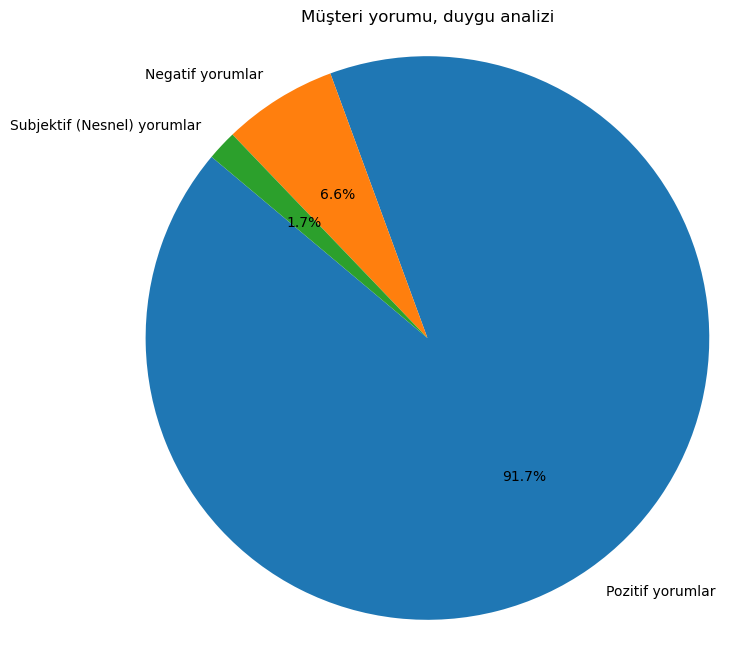

In [36]:
plt.figure(figsize=(8, 8)) 
plt.pie(YorumList, labels=labelList, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Müşteri yorumu, duygu analizi')